In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import pandas_datareader as web
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
# Generate Word Cloud image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Read sentiment result for Top 5 Cryptos and News

In [2]:
forbes_news = pd.read_csv(r"Data/text_data/Forbes_News_sentiment.csv", sep="\t")
coindesk_init_news = pd.read_csv(r"Data/text_data/CoinDesk_News_sentiment.csv", sep="\t")

#crypto
MANA_general = pd.read_csv(r"Data/text_data/MANA_General_sentiment.csv", sep="\t")

BTC_general = pd.read_csv(r"Data/text_data/BTC_General_sentiment.csv", sep="\t")

ETH_general = pd.read_csv(r"Data/text_data/ETH_General_sentiment.csv", sep="\t")

BNB_general = pd.read_csv(r"Data/text_data/BNB_General_sentiment.csv", sep="\t")

ENJ_general = pd.read_csv(r"Data/text_data/ENJ_General_sentiment.csv", sep="\t")

RACA_general = pd.read_csv(r"Data/text_data/RACA_General_sentiment.csv", sep="\t")

# Group sentiment score to daily (average)

In [3]:
def match_date(start, end, data):
    data.date = pd.to_datetime(data.date)
    data = data[(data['date'] >= start) & (data['date'] <= end)]
    data["date"] = data["date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
    #data.columns = data.columns.str.replace('Date', 'date')
    return data

In [4]:
def sentiment_groupby_day(data):
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    data.drop(columns=data.columns[1], axis=1, inplace=True)
    data = data.groupby(['date'])['sentiment_score'].mean().reset_index().rename(columns={'mean':'sentiment score'})
    data = data.set_index('date') 
    
    data["sentiment_score_1"] = data.shift(1)
    
    data = data.sort_index() # sort by datetime
    return data

In [5]:
def filter_news_sentiment(start, end, data):
    data["date"] = data["date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
    crypto_news = data[(data['category'] == 'Cryptocurrencies')].reset_index()
    stocks_market_news = data[(data['category'] == 'Stock Market')].reset_index()
    finance_news = data[(data['category'] == 'Finance')].reset_index()
    #metaverse_news = data[(data['category'] == 'Metaverse')].reset_index()
    
    crypto_news = split_news_category(crypto_news)
    stocks_market_news = split_news_category(stocks_market_news)
    finance_news = split_news_category(finance_news)
    #metaverse_news = split_news_category(metaverse_news, remove_pos_bias, remove_neg_bias)
    
    return crypto_news,stocks_market_news,finance_news

In [6]:
def filter_coindesk_news_sentiment(start, end, data):
    data["date"] = data["date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
    data = split_news_category(data)
    
    return data

In [7]:
def split_news_category(data):
    #group daily sentiment score
    data = data.drop(['content'], axis=1)
    data = data.groupby(['date'])['sentiment_score'].mean().reset_index().rename(columns={'mean':'sentiment score'})
    data = data.set_index('date') 
    data = data.sort_index() # sort by datetime
    data = data.reset_index()
    
    data = data.set_index('date')
    
    data["sentiment_score_1"] = data.shift(1)
    return data

In [8]:
start = dt.datetime(2021,10,1)
end = dt.datetime(2022,6,30)

In [9]:
crypto_news, stocks_market_news, finance_news = filter_news_sentiment(start, end, forbes_news)

In [10]:
coindesk_news = filter_coindesk_news_sentiment(start, end, coindesk_init_news)

In [56]:
coindesk_news

sentiment_score  sentiment_score_1
date                                          
2021-10-29         0.200340                NaN
2021-10-30         0.439002           0.200340
2021-11-29         0.017908           0.439002
2021-11-30        -0.032726           0.017908
2021-12-30        -0.043651          -0.032726
...                     ...                ...
2022-06-26        -0.276699          -0.403787
2022-06-27        -0.048249          -0.276699
2022-06-28         0.035339          -0.048249
2022-06-29        -0.263334           0.035339
2022-06-30        -0.371949          -0.263334

[182 rows x 2 columns]

In [11]:
#crypto sentiment group processing
mana_general_by_day = sentiment_groupby_day(match_date(start, end, MANA_general))

btc_general_by_day = sentiment_groupby_day(match_date(start, end, BTC_general))

eth_general_by_day = sentiment_groupby_day(match_date(start, end, ETH_general))

bnb_general_by_day = sentiment_groupby_day(match_date(start, end, BNB_general))

enj_general_by_day = sentiment_groupby_day(match_date(start, end, ENJ_general))

raca_general_by_day = sentiment_groupby_day(match_date(start, end, RACA_general))

In [12]:
#read crypto pricing
#extract data from yahoo finance
MANA = web.DataReader('MANA-USD','yahoo', start, end)
BTC = web.DataReader('BTC-USD','yahoo', start, end)
ETH = web.DataReader('ETH-USD','yahoo', start, end)
ENJ = web.DataReader('ENJ-USD','yahoo', start, end)
BNB = web.DataReader('BNB-USD','yahoo', start, end)
RACA = web.DataReader('RACA-USD','yahoo', start, end)

In [13]:
MANA = MANA.reset_index()
BTC = BTC.reset_index()
ETH = ETH.reset_index()
BNB = BNB.reset_index()
ENJ = ENJ.reset_index()
RACA = RACA.reset_index()

In [14]:
MANA.columns = MANA.columns.str.replace('Date', 'date')
BTC.columns = BTC.columns.str.replace('Date', 'date')
ETH.columns = ETH.columns.str.replace('Date', 'date')
BNB.columns = BNB.columns.str.replace('Date', 'date')
ENJ.columns = ENJ.columns.str.replace('Date', 'date')
RACA.columns = RACA.columns.str.replace('Date', 'date')

#match date with sentiment score
MANA = match_date(start, end, MANA)
BTC = match_date(start, end, BTC)
ETH = match_date(start, end, ETH)
BNB = match_date(start, end, BNB)
ENJ = match_date(start, end, ENJ)
RACA = match_date(start, end, RACA)

In [15]:
MANA

date      High       Low      Open     Close     Volume  Adj Close
1    2021-10-01  0.759664  0.680543  0.689574  0.752952  118813928   0.752952
2    2021-10-02  0.782058  0.739827  0.753739  0.753345   96996179   0.753345
3    2021-10-03  0.771574  0.739199  0.752185  0.765275   76887615   0.765275
4    2021-10-04  0.828786  0.726742  0.768490  0.766261  242492275   0.766261
5    2021-10-05  0.784447  0.747183  0.766634  0.781664  119228151   0.781664
..          ...       ...       ...       ...       ...        ...        ...
269  2022-06-26  1.045380  0.932058  1.024440  0.932485  281246216   0.932485
270  2022-06-27  1.000023  0.930823  0.932579  0.965868  288233106   0.965868
271  2022-06-28  1.002982  0.882965  0.965527  0.886755  247513073   0.886755
272  2022-06-29  0.898020  0.862645  0.886830  0.877121  187354433   0.877121
273  2022-06-30  0.882398  0.801100  0.877689  0.879234  228429941   0.879234

[273 rows x 7 columns]

In [16]:
#add pct change column to capture daily crypto price change
ClosingPrice = MANA[['Adj Close']]
MANA['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = BTC[['Adj Close']]
BTC['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = ETH[['Adj Close']]
ETH['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = BNB[['Adj Close']]
BNB['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = ENJ[['Adj Close']]
ENJ['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = RACA[['Adj Close']]
RACA['pct_change'] = ClosingPrice.pct_change()*100

MANA = MANA.set_index('date')
BTC = BTC.set_index('date')
ETH = ETH.set_index('date')
BNB = BNB.set_index('date')
ENJ = ENJ.set_index('date')
RACA = RACA.set_index('date')

MANA.to_csv(r"Data/price/{0}_price.csv".format("MANA"), sep="\t")
BTC.to_csv(r"Data/price/{0}_price.csv".format("BTC"), sep="\t")
ETH.to_csv(r"Data/price/{0}_price.csv".format("ETH"), sep="\t")
BNB.to_csv(r"Data/price/{0}_price.csv".format("BNB"), sep="\t")
ENJ.to_csv(r"Data/price/{0}_price.csv".format("ENJ"), sep="\t")
RACA.to_csv(r"Data/price/{0}_price.csv".format("RACA"), sep="\t")

In [17]:
def plot_xy(ax,x, data, title):
    # first plot crypto news vs price change
    ax[x].plot(data.index, data['sentiment_score'], color="red", marker="o")
    # set x-axis label
    ax[x].set_xlabel("Date",fontsize=14)
    #ax[x,y].set_xticklabels(data.index, rotation=45)
    # set y-axis label
    ax[x].set_ylabel("Sentiment score",color="red",fontsize=14)
    ax[x].set_title(title, fontsize=14)
    # twin object for two different y-axis on the sample plot
    ax2=ax[x].twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(data.index, data['pct_change'],color="blue",marker="o")
    ax2.set_ylabel("Daily Percentage Change",color="blue",fontsize=14)

In [18]:
def sentiment_price_corr(data):
    # Compute the correlation matrix
    # plotting correlation heatmap
    fig, ax = plt.subplots(figsize=(10, 10))
    dataplot = sns.heatmap(data.corr(), annot=True,linewidths=.5)

# Explore Correlation between sentiment score and Price change

Compare the correlation between sentiment score and price change without lagged score index

In [19]:
merge_data = pd.DataFrame({ 
                            'Crypto News Sentiment': crypto_news.sentiment_score,
                            'Stock Market News Sentiment': stocks_market_news.sentiment_score,
                            'Finance News Sentiment': finance_news.sentiment_score,
                            'CoinDesk News Sentiment': coindesk_news.sentiment_score,
                            'MANA Price Change' :  MANA['pct_change'],
                            'MANA General Sentiment':mana_general_by_day.sentiment_score,
                            'BTC Price Change' :  BTC['pct_change'],
                            'BTC General Sentiment':btc_general_by_day.sentiment_score,
                            'ETH Price Change' :  ETH['pct_change'],
                            'ETH General Sentiment':eth_general_by_day.sentiment_score,
                            'BNB Price Change' :  BNB['pct_change'],
                            'BNB General Sentiment':bnb_general_by_day.sentiment_score,
                            'ENJ Price Change' :  ENJ['pct_change'],
                            'ENJ General Sentiment':enj_general_by_day.sentiment_score,
                            'RACA Price Change' :  RACA['pct_change'],
                            'RACA General Sentiment':raca_general_by_day.sentiment_score
                          })

In [20]:
crypto_summary = merge_data.describe()

In [21]:
crypto_summary.T

count      mean        std        min       25%  \
Crypto News Sentiment        256.0 -0.014878   0.301498  -0.920733 -0.168265   
Stock Market News Sentiment  250.0 -0.013935   0.238793  -0.779616 -0.132752   
Finance News Sentiment       268.0 -0.036953   0.149294  -0.639505 -0.108155   
CoinDesk News Sentiment      182.0 -0.135159   0.264737  -0.910603 -0.321934   
MANA Price Change            272.0  0.586838  12.369567 -29.818555 -4.238100   
MANA General Sentiment       272.0  0.072788   0.019368   0.015959  0.061626   
BTC Price Change             272.0 -0.263260   3.536880 -15.974726 -2.215618   
BTC General Sentiment        272.0  0.090623   0.040573  -0.042345  0.066797   
ETH Price Change             272.0 -0.323680   4.250221 -16.650362 -2.739146   
ETH General Sentiment        271.0  0.068918   0.054153  -0.298439  0.042327   
BNB Price Change             272.0 -0.157347   4.040959 -15.770963 -2.439717   
BNB General Sentiment        272.0  0.044877   0.032298  -0.170148  0.032658   
ENJ Price Change             272.0 -0.174547   6.765467 -23.911166 -4.511735   
ENJ General Sentiment        272.0  0.088632   0.057925  -0.082808  0.063815   
RACA Price Change            272.0  0.410063  11.071182 -42.139171 -5.058950   
RACA General Sentiment       272.0  0.071835   0.032152  -0.015519  0.051314   

                                  50%       75%         max  
Crypto News Sentiment        0.023751  0.159489    0.906488  
Stock Market News Sentiment  0.005498  0.132059    0.866740  
Finance News Sentiment      -0.018119  0.053396    0.472588  
CoinDesk News Sentiment     -0.111075  0.030216    0.599853  
MANA Price Change           -0.290416  3.363587  154.738406  
MANA General Sentiment       0.071630  0.084300    0.166036  
BTC Price Change            -0.124887  1.650544   14.541184  
BTC General Sentiment        0.085116  0.109456    0.312961  
ETH Price Change            -0.133919  2.188222   13.487797  
ETH General Sentiment        0.067339  0.089537    0.339313  
BNB Price Change            -0.009692  2.299822    9.730477  
BNB General Sentiment        0.046992  0.059706    0.152868  
ENJ Price Change            -0.240746  3.886776   24.728363  
ENJ General Sentiment        0.087106  0.118103    0.348005  
RACA Price Change           -0.908339  4.789599   48.925553  
RACA General Sentiment       0.068720  0.088663    0.165491

# Filter sentiment score only between 0.3 above and -0.3 above

## Explore total count of Sentiment

This helps us to understand how the sentiment polarity generated.

In [22]:
def get_total_sentiment(sentiments, title):
    print("The total number of data: ", len(sentiments))
    
    data = []
    for item in sentiments:
        if item >= 0.3:
            data.append("Positive")
        elif item <= -0.3:
            data.append("Negative")
        else:
            data.append("Neutral")
    
    plt.figure(figsize=(10,6))
    
    palette ={"Positive": "C0", "Neutral": "C1", "Negative": "C2"}
    
    ax = sns.countplot(x=data, palette=palette, order = data.sort())
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.title('{0}: The number of data'.format(title))
    plt.show()

The total number of data:  256


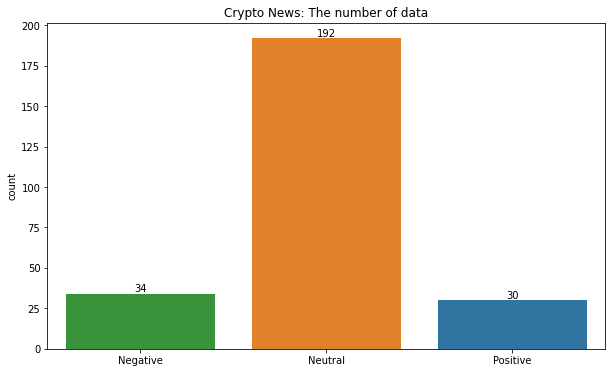

In [23]:
get_total_sentiment(crypto_news.sentiment_score, "Crypto News")

The total number of data:  250


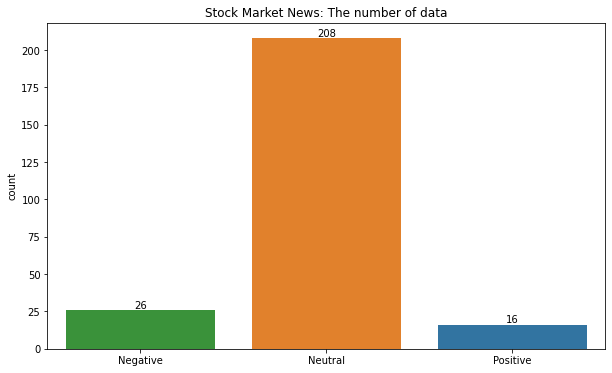

In [24]:
get_total_sentiment(stocks_market_news.sentiment_score, "Stock Market News")

The total number of data:  268


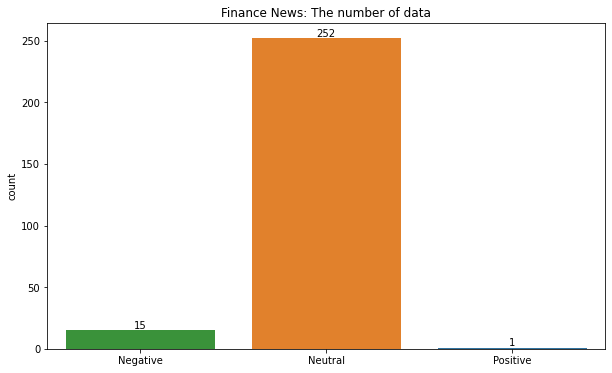

In [25]:
get_total_sentiment(finance_news.sentiment_score, "Finance News")

The total number of data:  182


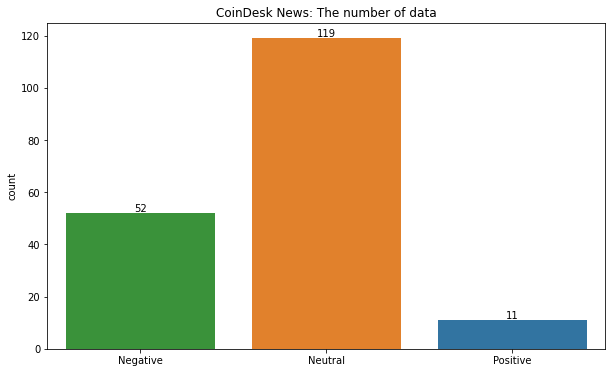

In [26]:
get_total_sentiment(coindesk_news.sentiment_score, "CoinDesk News")

The total number of data:  272


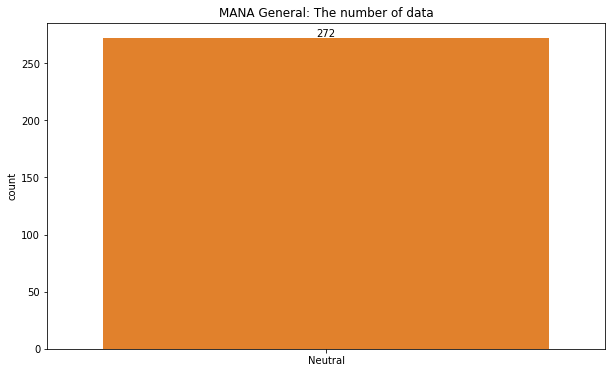

In [27]:
get_total_sentiment(mana_general_by_day.sentiment_score, "MANA General")

The total number of data:  272


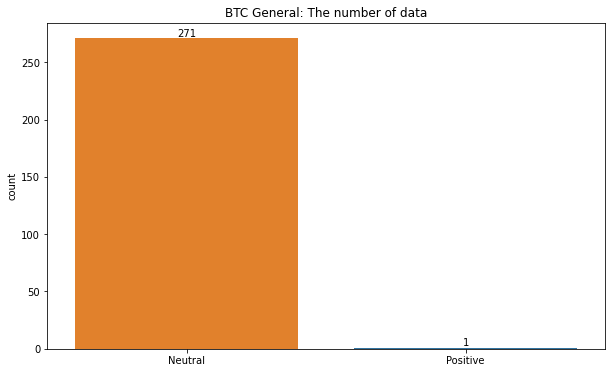

In [28]:
get_total_sentiment(btc_general_by_day.sentiment_score, "BTC General")

The total number of data:  271


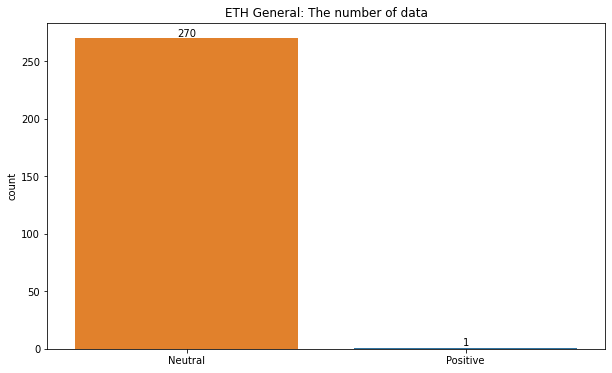

In [29]:
get_total_sentiment(eth_general_by_day.sentiment_score, "ETH General")

The total number of data:  272


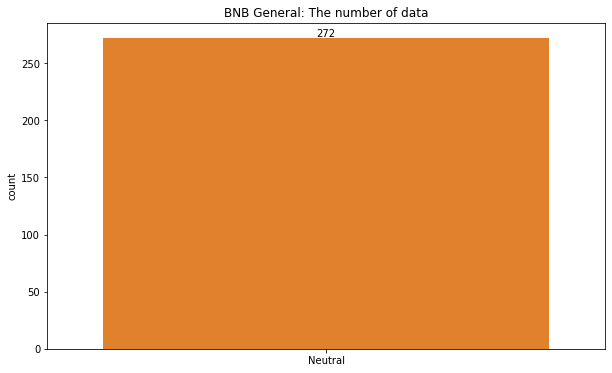

In [30]:
get_total_sentiment(bnb_general_by_day.sentiment_score, "BNB General")

The total number of data:  272


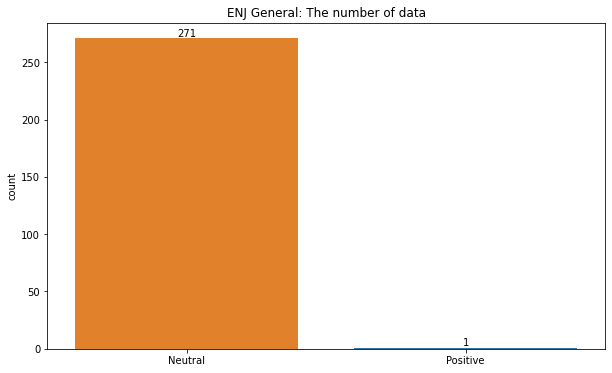

In [31]:
get_total_sentiment(enj_general_by_day.sentiment_score, "ENJ General")

The total number of data:  272


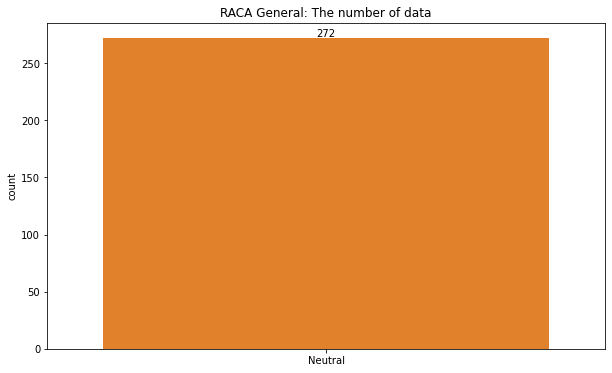

In [32]:
get_total_sentiment(raca_general_by_day.sentiment_score, "RACA General")

Based on the result count polarity, we could identify what need to be include for explore correlation. 
If there is no negative and positive polarity, we can skip that for the experiments. 

### Finding Correlation

In [33]:
#remove all the sentiment score left only between -0.5 above or more than 0.5
positive = 0.3
negative = -0.3

crypto_news_filter = crypto_news[(crypto_news['sentiment_score'] > positive) | (crypto_news['sentiment_score'] < negative)]
stocks_market_news_filter = stocks_market_news[(stocks_market_news['sentiment_score'] > positive) | (stocks_market_news['sentiment_score'] < negative)]
finance_news_filter = finance_news[(finance_news['sentiment_score'] > positive) | (finance_news['sentiment_score'] < negative)]
coindesk_news_filter = coindesk_news[(coindesk_news['sentiment_score'] > positive) | (coindesk_news['sentiment_score'] < negative)]


In [34]:
crypto_news_filter

sentiment_score  sentiment_score_1
date                                          
2021-10-10        -0.920733          -0.115158
2021-10-16        -0.389975           0.001880
2021-10-25         0.316597          -0.157612
2021-11-13        -0.725143          -0.232662
2021-11-21        -0.560355           0.029805
...                     ...                ...
2022-06-20        -0.449065           0.698413
2022-06-21         0.315854          -0.449065
2022-06-27         0.358623          -0.145130
2022-06-28        -0.382885           0.358623
2022-06-29        -0.461700          -0.382885

[64 rows x 2 columns]

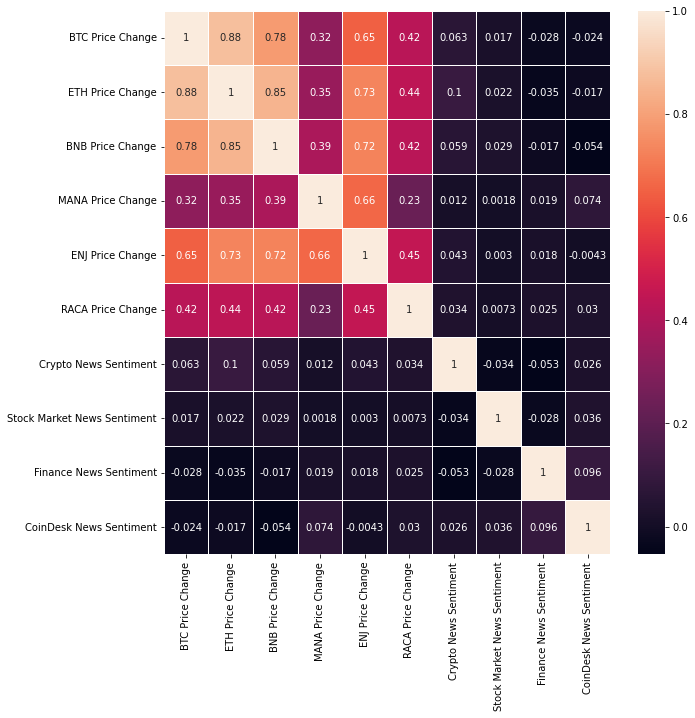

In [35]:
corr_merge_data = pd.DataFrame({ 
                            'BTC Price Change' :  BTC['pct_change'],
                            'ETH Price Change' :  ETH['pct_change'],
                            'BNB Price Change' :  BNB['pct_change'],
                            'MANA Price Change' :  MANA['pct_change'],
                            'ENJ Price Change' :  ENJ['pct_change'],
                            'RACA Price Change' :  RACA['pct_change'],
                            'Crypto News Sentiment': crypto_news_filter.sentiment_score,
                            'Stock Market News Sentiment': stocks_market_news_filter.sentiment_score,
                            'Finance News Sentiment': finance_news_filter.sentiment_score,
                            'CoinDesk News Sentiment': coindesk_news_filter.sentiment_score
                          })
sentiment_price_corr(corr_merge_data.fillna(0))

Compare the correlation between sentiment score and price change without lagged score index

In [36]:
crypto_news_filter_lagged = crypto_news[(crypto_news['sentiment_score_1'] > positive) | (crypto_news['sentiment_score_1'] < negative)]
stocks_market_news_filter_lagged = stocks_market_news[(stocks_market_news['sentiment_score_1'] > positive) | (stocks_market_news['sentiment_score_1'] < negative)]
finance_news_filter_lagged = finance_news[(finance_news['sentiment_score_1'] > positive) | (finance_news['sentiment_score_1'] < negative)]
coindesk_news_filter_lagged = coindesk_news[(coindesk_news['sentiment_score_1'] > positive) | (coindesk_news['sentiment_score_1'] < negative)]


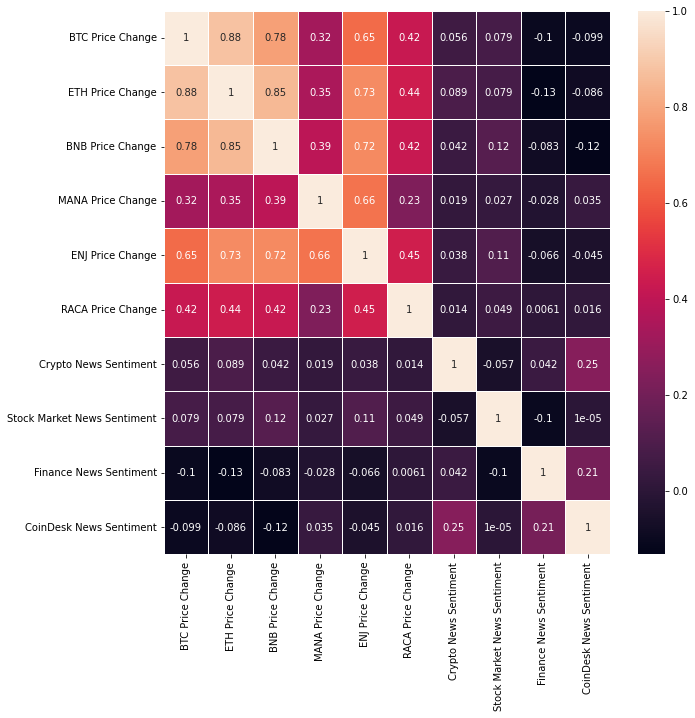

In [37]:
corr_data_lagged = pd.DataFrame({ 
                            'BTC Price Change' :  BTC['pct_change'],
                            'ETH Price Change' :  ETH['pct_change'],
                            'BNB Price Change' :  BNB['pct_change'],
                            'MANA Price Change' :  MANA['pct_change'],
                            'ENJ Price Change' :  ENJ['pct_change'],
                            'RACA Price Change' :  RACA['pct_change'],
                            'Crypto News Sentiment': crypto_news_filter.sentiment_score_1,
                            'Stock Market News Sentiment': stocks_market_news_filter.sentiment_score_1,
                            'Finance News Sentiment': finance_news_filter.sentiment_score_1,
                            'CoinDesk News Sentiment': coindesk_news_filter.sentiment_score_1
                          })
sentiment_price_corr(corr_data_lagged.fillna(0))

# Discover most frequent words

In [38]:
# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([str(nws) for nws in text])
    wordCloud = WordCloud(background_color='white',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud,interpolation="bilinear")
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

Wordcloud for Cryto News


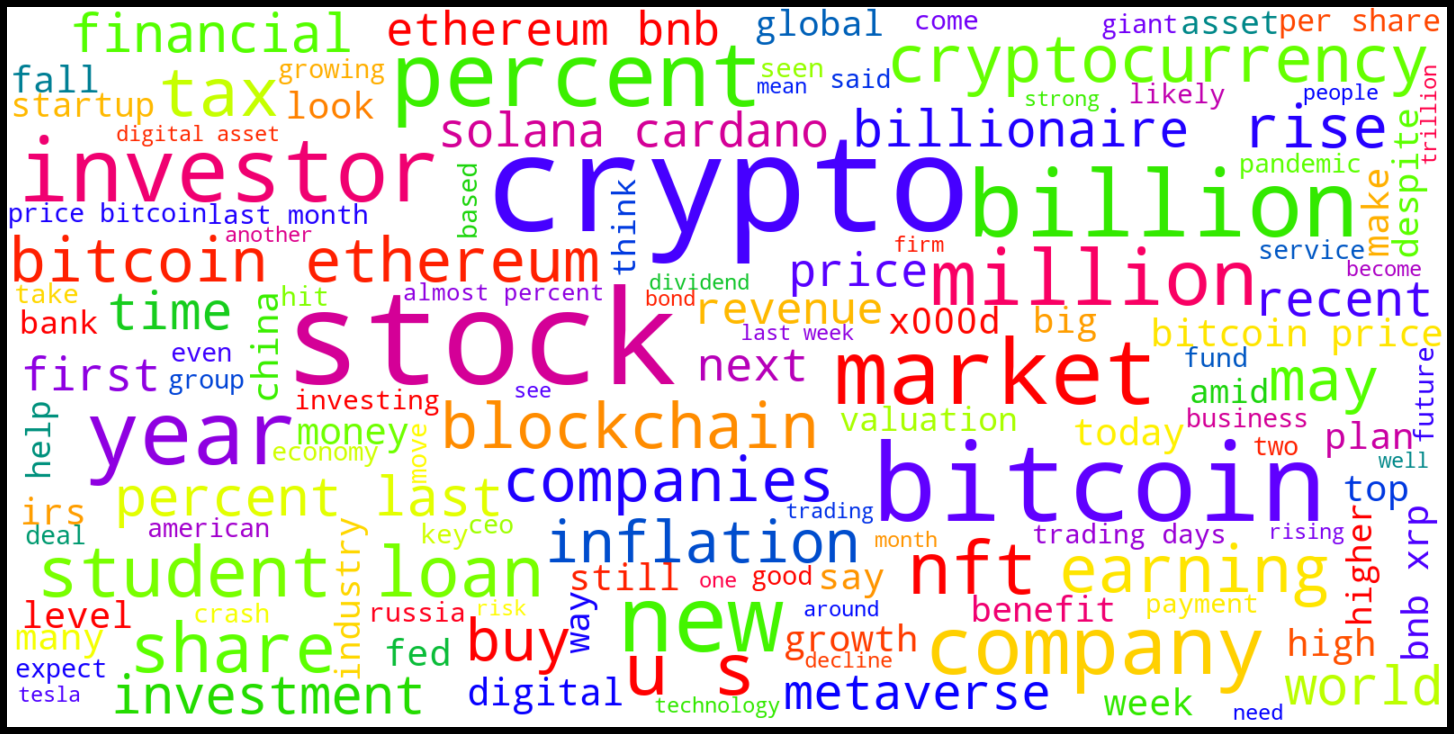

In [39]:
print('Wordcloud for {0}'.format("Cryto News"))
crypto_news_word = forbes_news[forbes_news["category"]=='Cryptocurrencies']
word_cloud(crypto_news_word['content'].values)

Wordcloud for Stock Market News


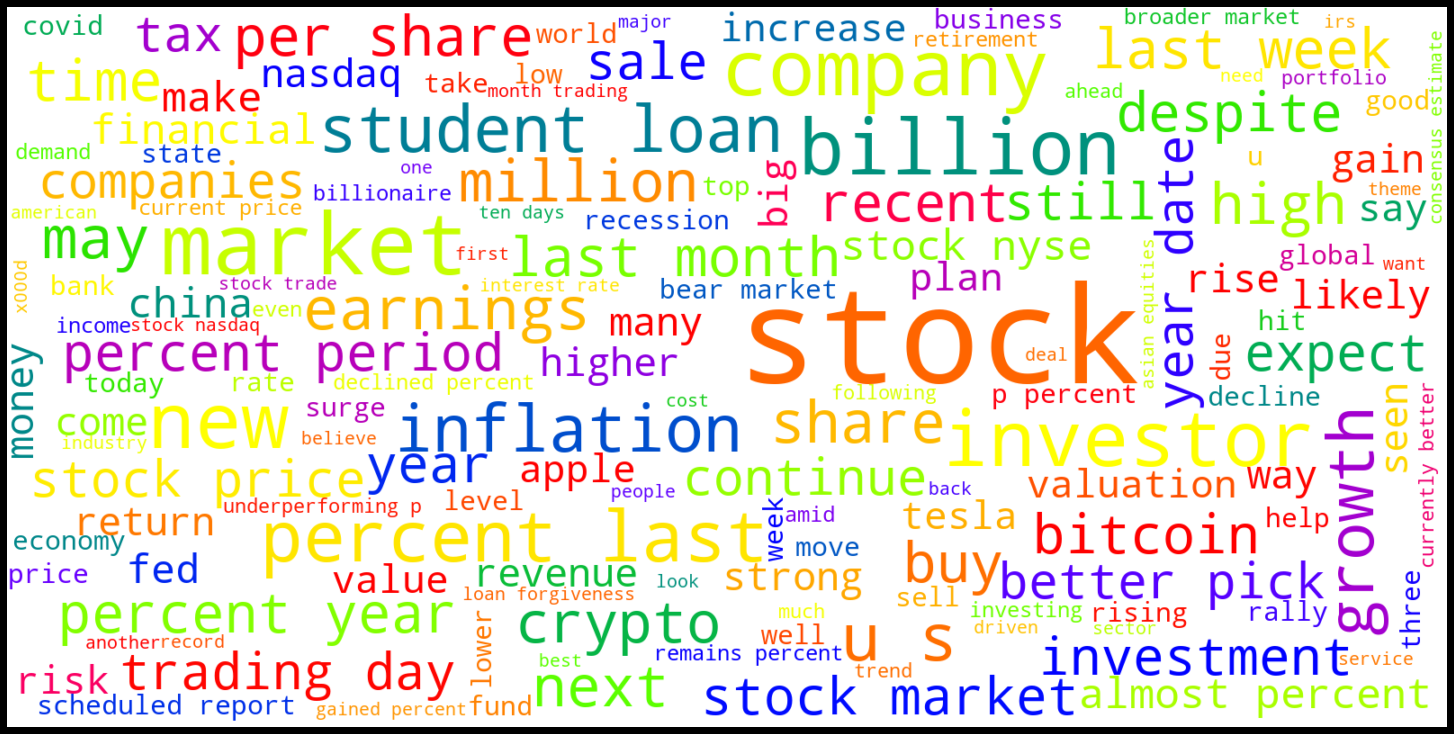

In [40]:
print('Wordcloud for {0}'.format("Stock Market News"))
stock_market_news_word = forbes_news[forbes_news["category"]=='Stock Market']
word_cloud(stock_market_news_word['content'].values)


Wordcloud for Finance News


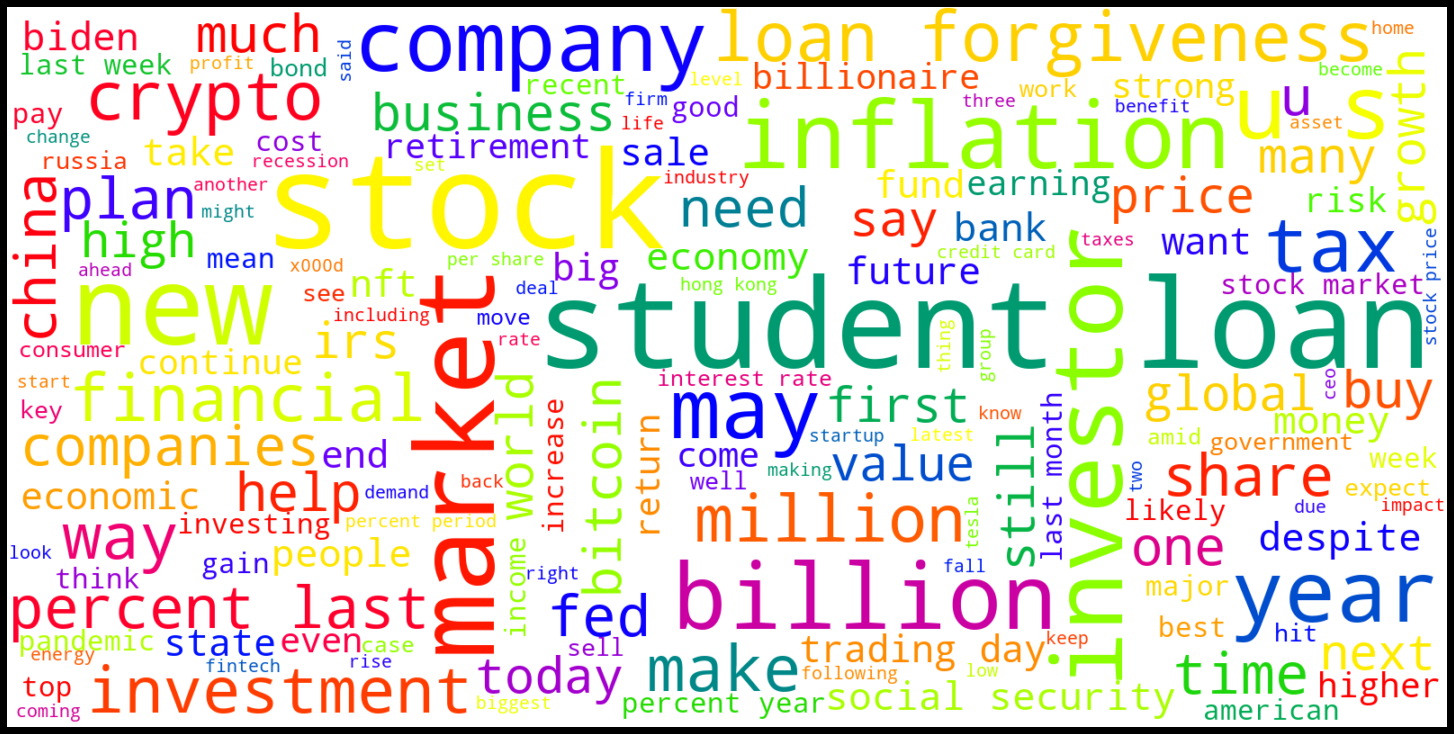

In [41]:

print('Wordcloud for {0}'.format("Finance News"))
finance_news_word = forbes_news[forbes_news["category"]=='Finance']
word_cloud(finance_news_word['content'].values)



Wordcloud for CoinDesk News


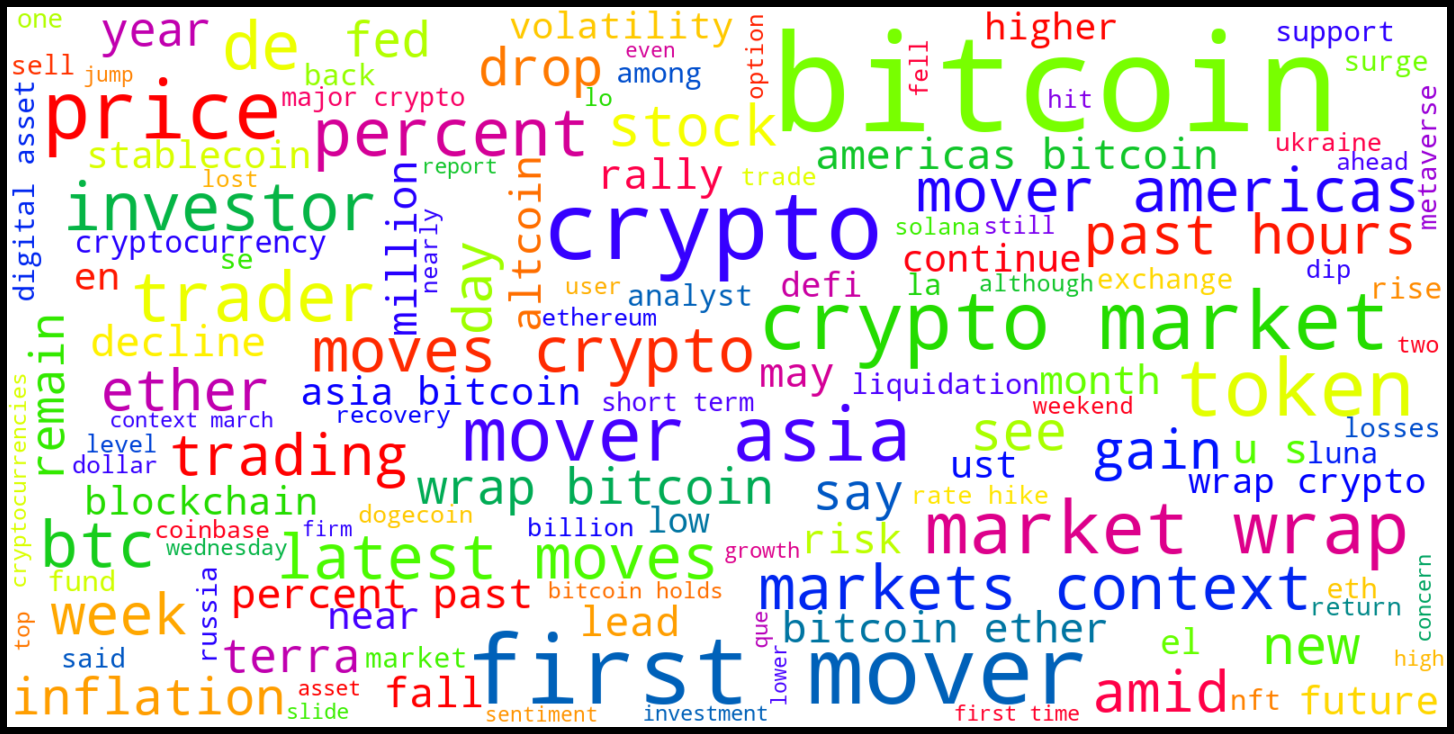

In [42]:
print('Wordcloud for {0}'.format("CoinDesk News"))
coindesk_news_word = coindesk_init_news
word_cloud(coindesk_news_word['content'].values)



Wordcloud for BTC General


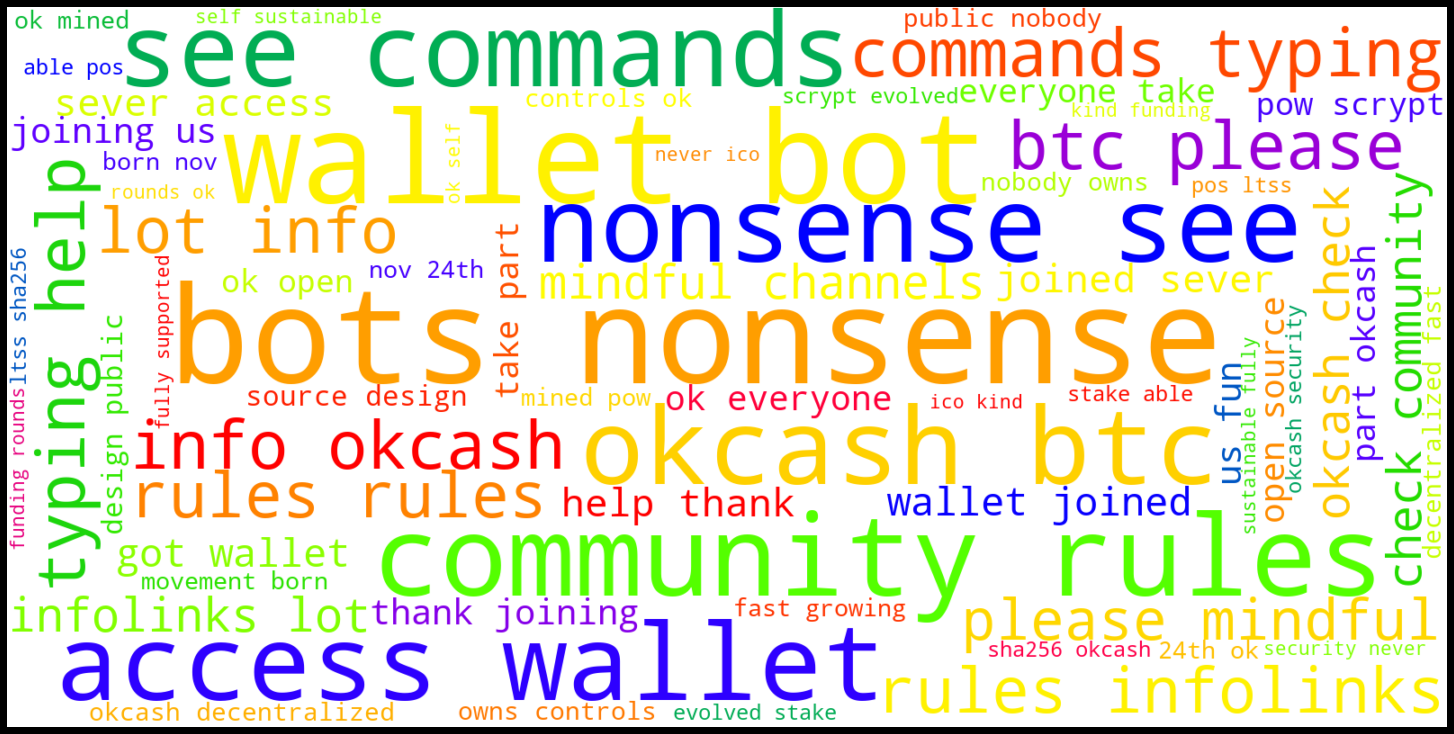

In [43]:
print('Wordcloud for {0}'.format("BTC General"))
word_cloud(BTC_general['content'].values)



Wordcloud for ETH General


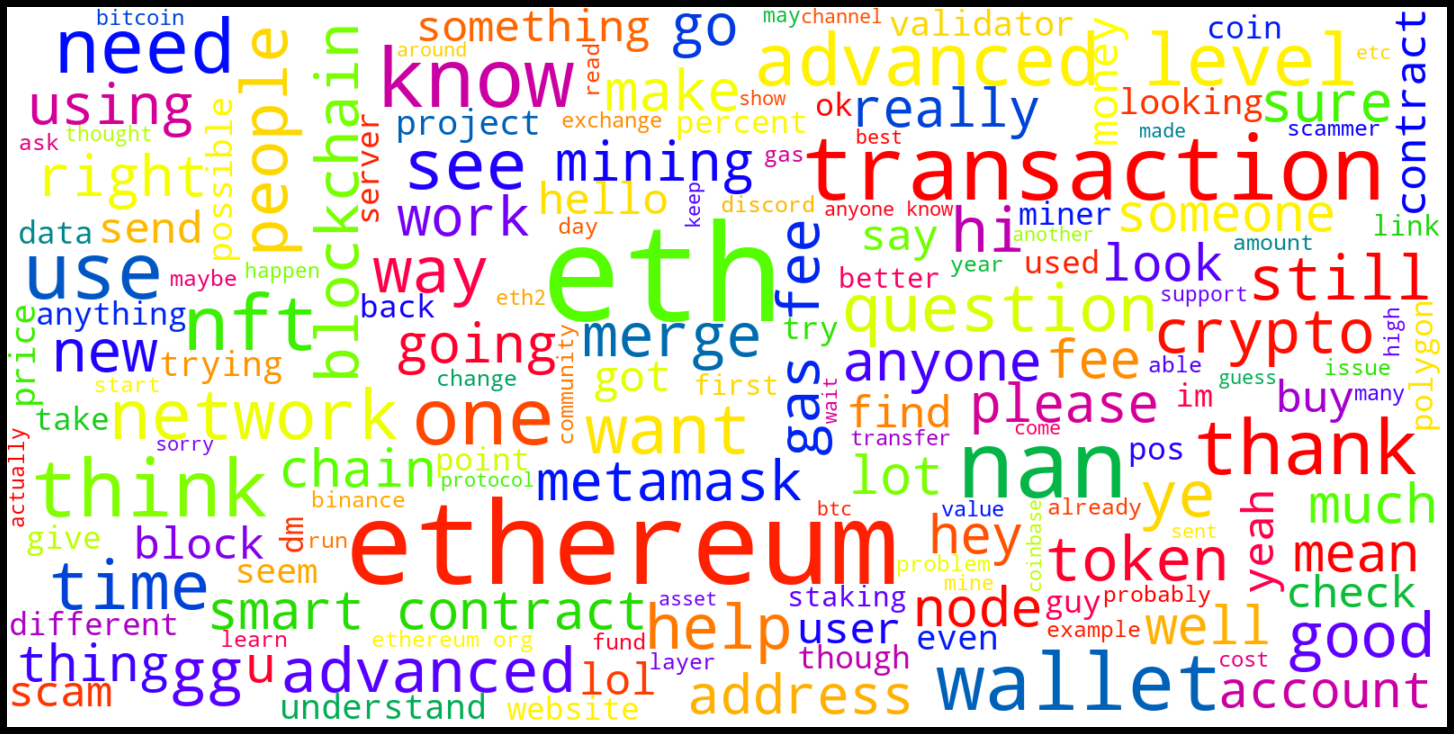

In [44]:
print('Wordcloud for {0}'.format("ETH General"))
word_cloud(ETH_general['content'].values)



Wordcloud for BNB General


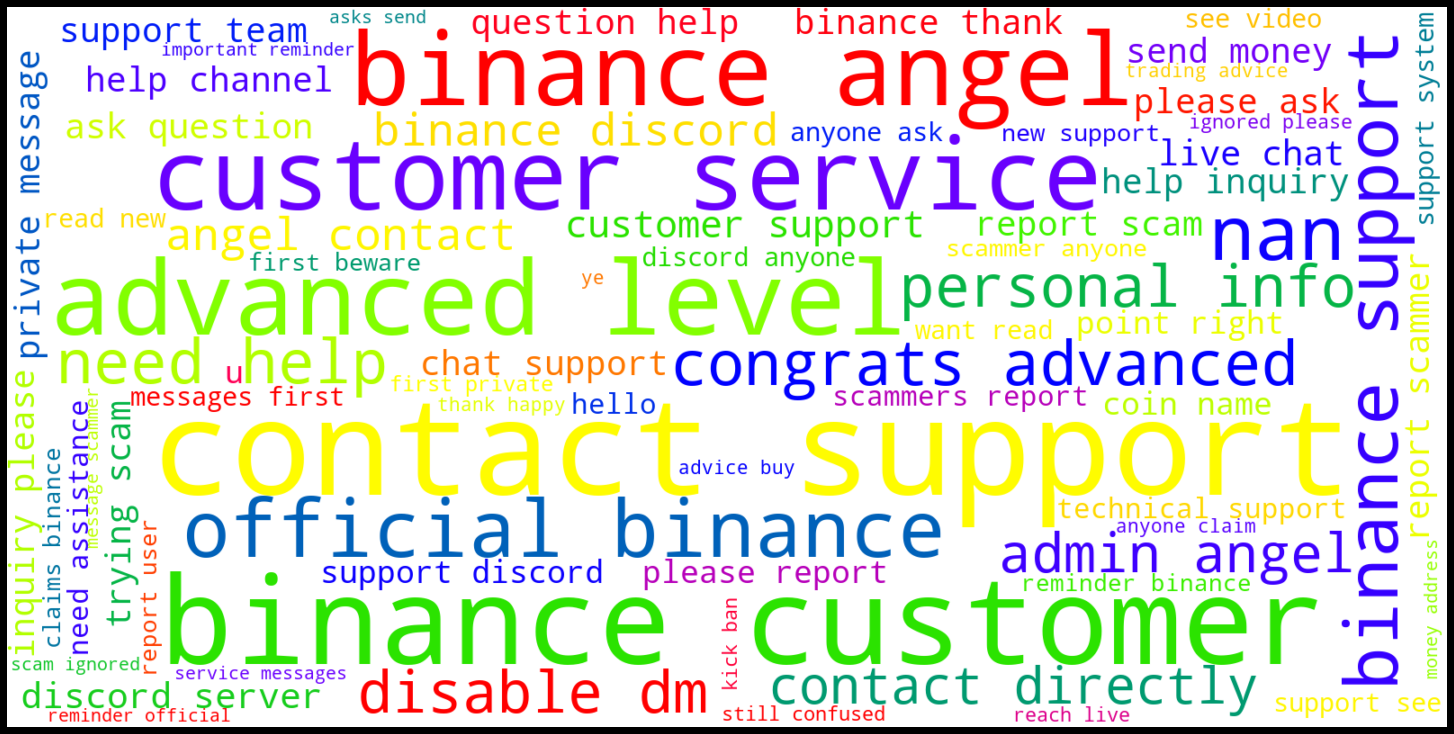

In [45]:
print('Wordcloud for {0}'.format("BNB General"))
word_cloud(BNB_general['content'].values)



Wordcloud for MANA General


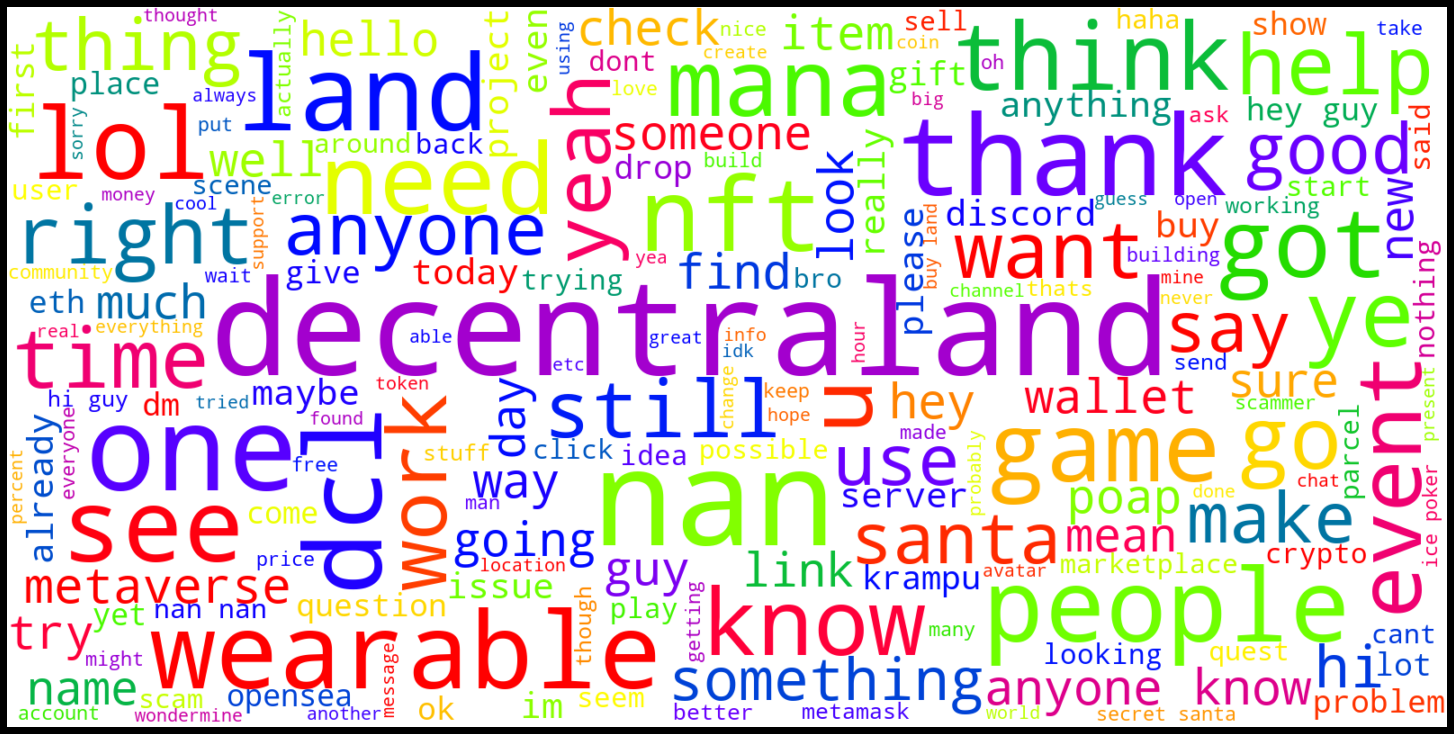

In [46]:
print('Wordcloud for {0}'.format("MANA General"))
word_cloud(MANA_general['content'].values)



Wordcloud for ENJ General


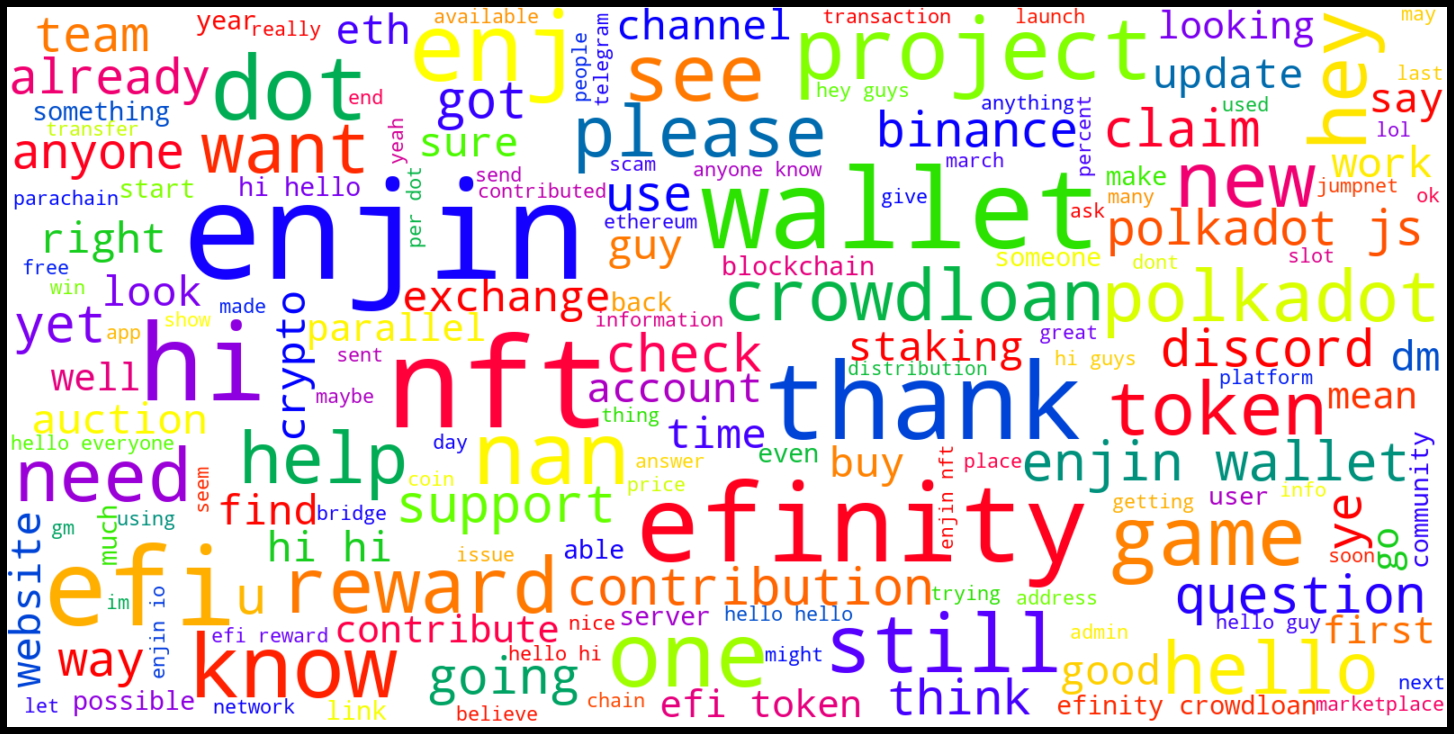

In [47]:
print('Wordcloud for {0}'.format("ENJ General"))
word_cloud(ENJ_general['content'].values)



Wordcloud for RACA General


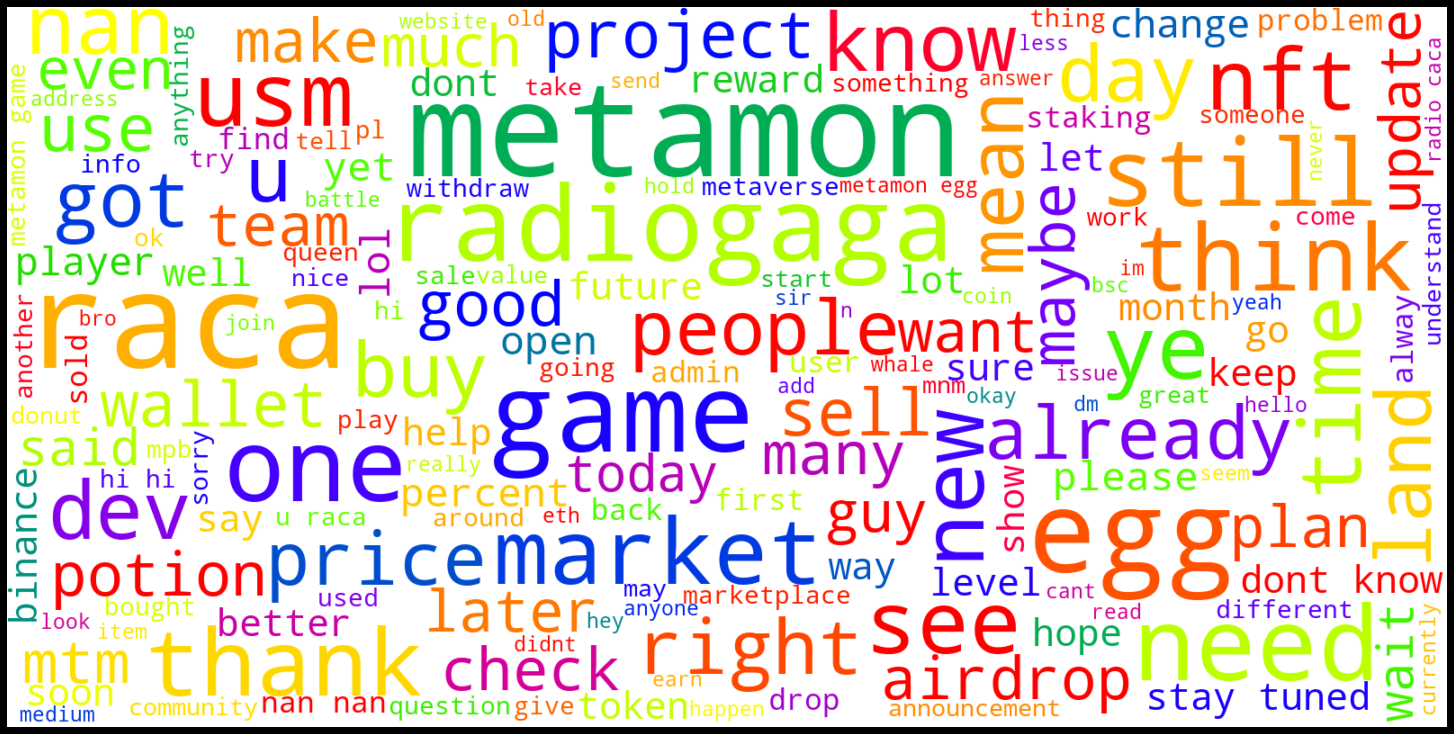

In [48]:
print('Wordcloud for {0}'.format("RACA General"))
word_cloud(RACA_general['content'].values)

# Plot Price Change vs Type of Sentiment

In [49]:
def plot_pricing_compare_sentiment(CryptoTitle, CryptoNews, StocksNews, FinanceNews, CoinDeskNews, num_plot=5):
    # create figure and axis objects with subplots()
    CryptoNews.reset_index()
    StocksNews.reset_index()
    
    fig,ax = plt.subplots(num_plot,1,figsize=(20,20))
    plt.subplots_adjust(hspace = 0.4)
    
    # first plot crypto news vs price change
    plot_xy(ax,0,CryptoNews,"{0} price change vs Crypto News".format(CryptoTitle))
    
    # Second plot crypto news vs price change
    plot_xy(ax,1,StocksNews,"{0} price change vs Stock Market News".format(CryptoTitle))
    
    FinanceNews.reset_index()
    # Third plot crypto news vs price change
    plot_xy(ax,2,FinanceNews,"{0} price change vs Finance News".format(CryptoTitle))
    
    CoinDeskNews.reset_index()
    # Third plot crypto news vs price change
    plot_xy(ax,3,CoinDeskNews,"{0} price change vs CoinDesk News".format(CryptoTitle))
    
    plt.show()


# MANA

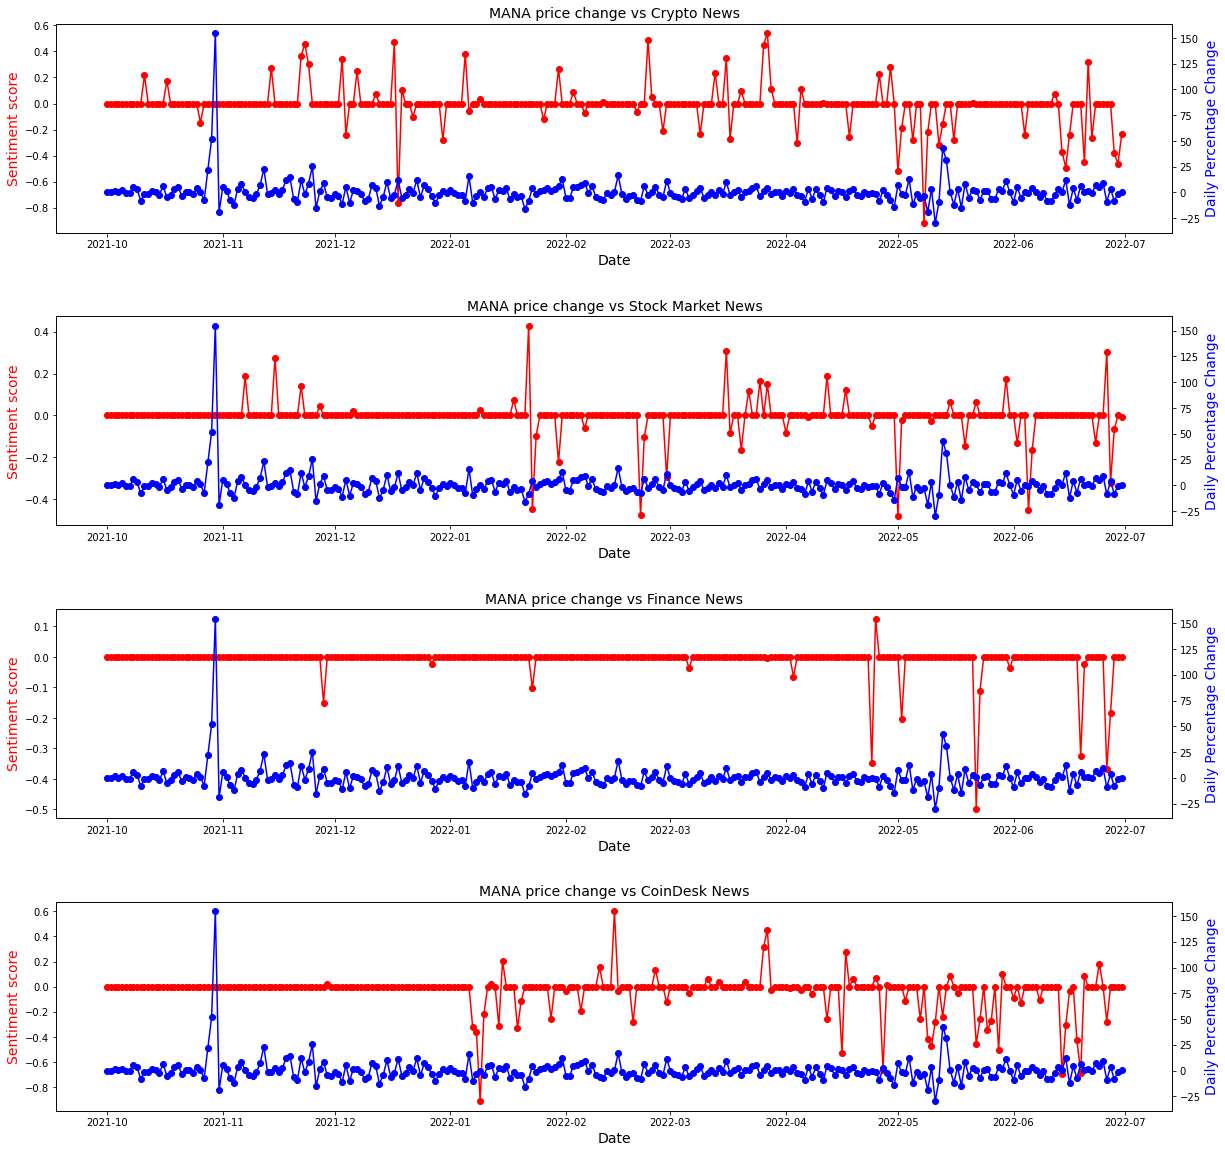

In [50]:
MANA_CryptoNews = MANA.join(crypto_news_filter_lagged).fillna(0)
MANA_StocksNews = MANA.join(stocks_market_news_filter_lagged).fillna(0)
MANA_FinanceNews = MANA.join(finance_news_filter_lagged).fillna(0)
MANA_CoinDeskNews = MANA.join(coindesk_news_filter_lagged).fillna(0)

plot_pricing_compare_sentiment("MANA", MANA_CryptoNews, MANA_StocksNews, MANA_FinanceNews, MANA_CoinDeskNews, num_plot=4)

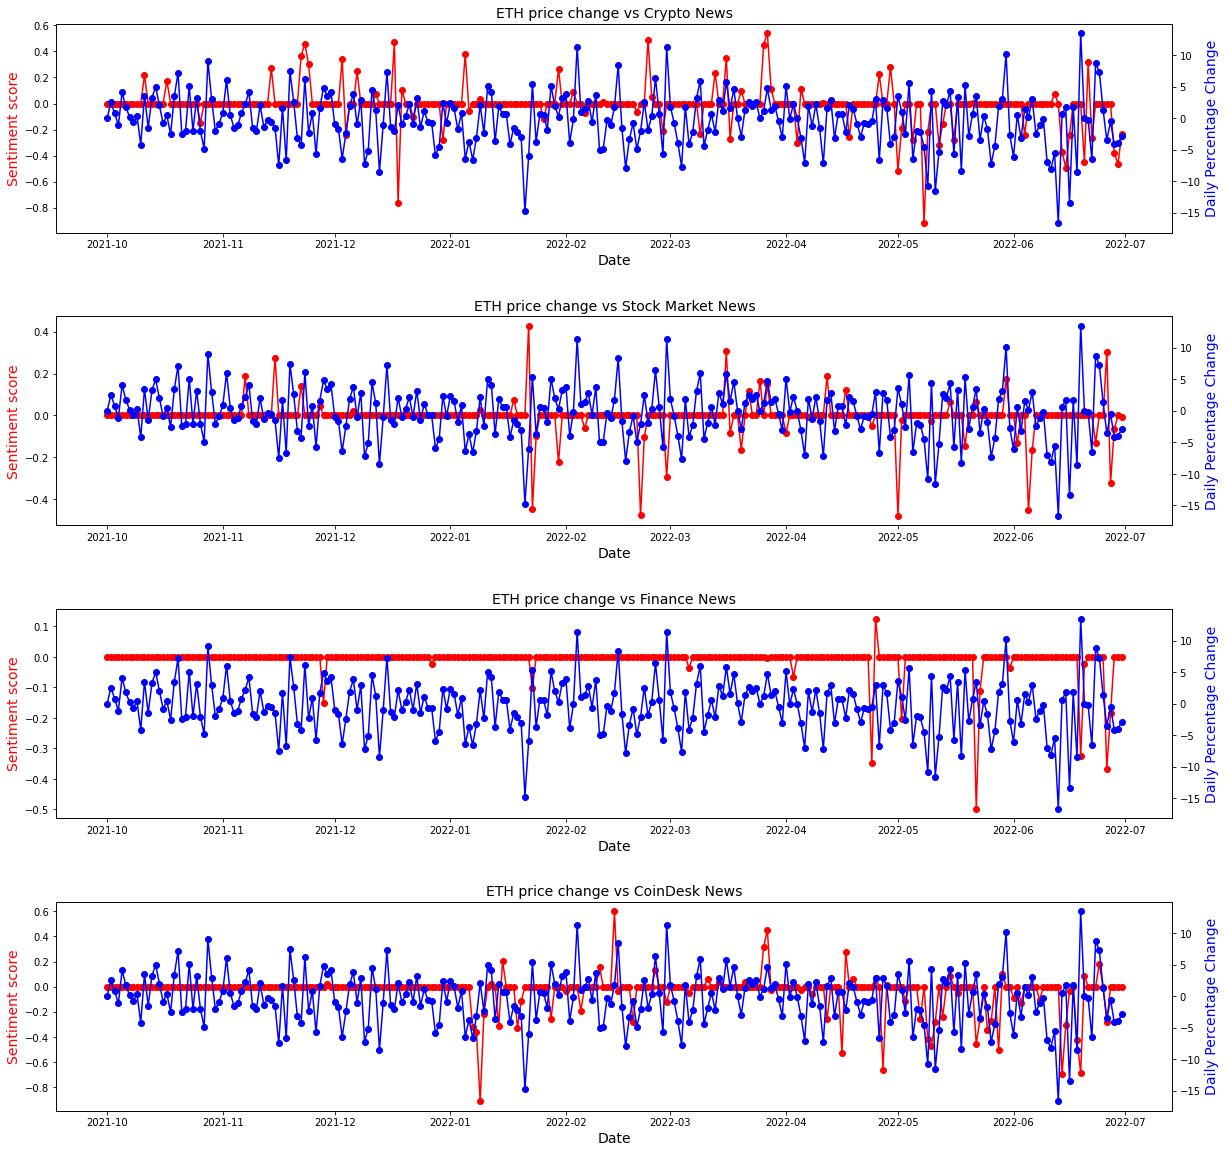

In [51]:
ETH_CryptoNews = ETH.join(crypto_news_filter_lagged).fillna(0)
ETH_StocksNews = ETH.join(stocks_market_news_filter_lagged).fillna(0)
ETH_FinanceNews = ETH.join(finance_news_filter_lagged).fillna(0)
ETH_CoinDeskNews = ETH.join(coindesk_news_filter_lagged).fillna(0)

plot_pricing_compare_sentiment("ETH", ETH_CryptoNews, ETH_StocksNews, ETH_FinanceNews, ETH_CoinDeskNews, num_plot=4)

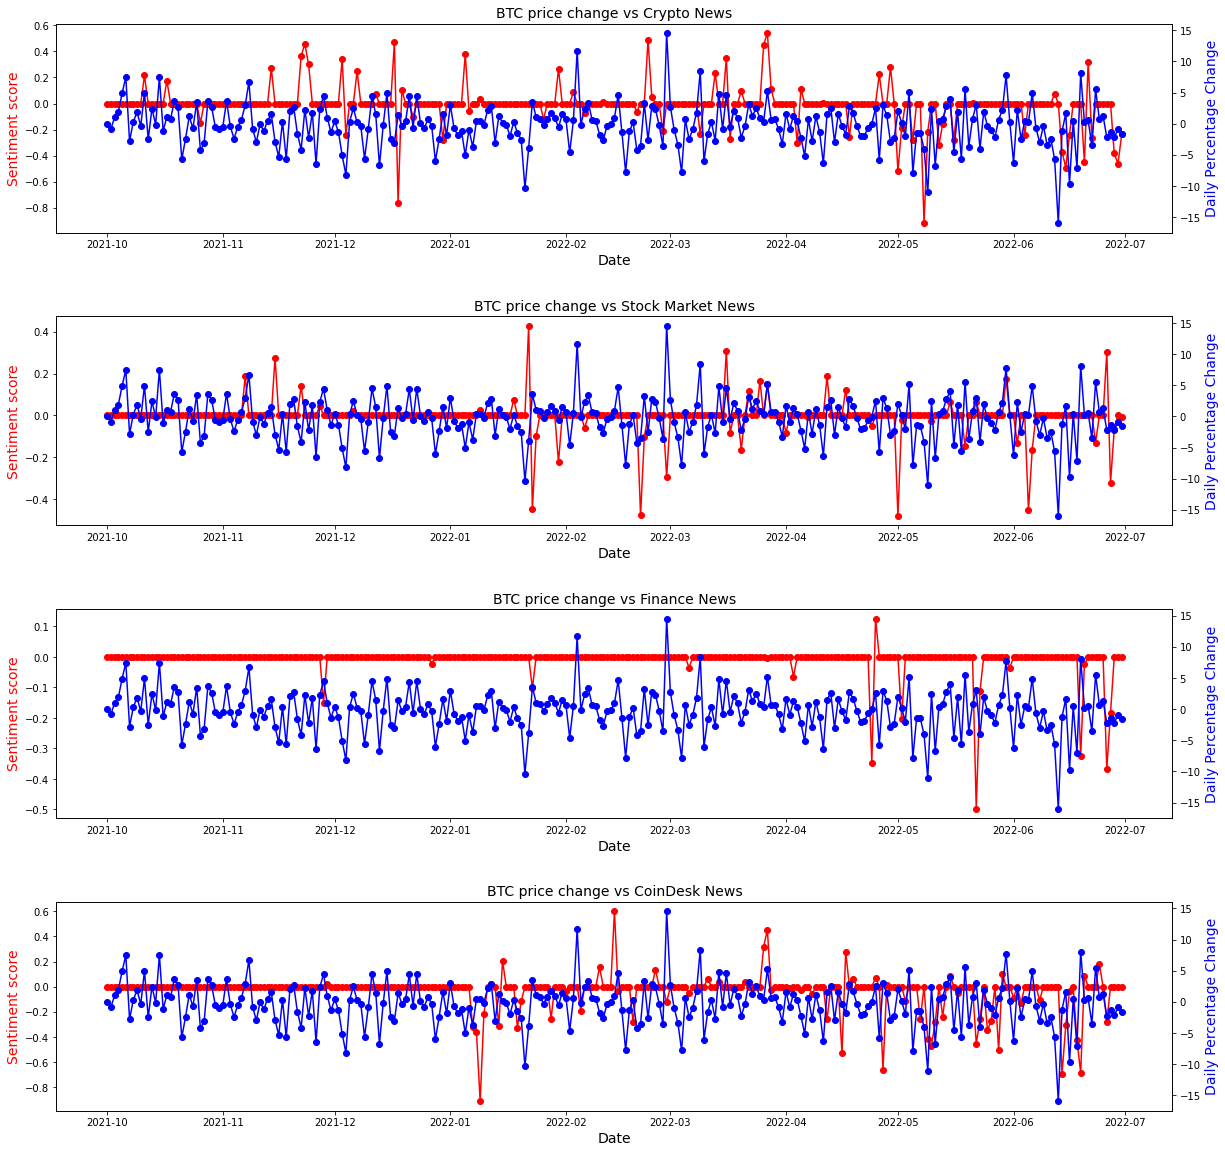

In [52]:
BTC_CryptoNews = BTC.join(crypto_news_filter_lagged).fillna(0)
BTC_StocksNews = BTC.join(stocks_market_news_filter_lagged).fillna(0)
BTC_FinanceNews = BTC.join(finance_news_filter_lagged).fillna(0)
BTC_CoinDeskNews = BTC.join(coindesk_news_filter_lagged).fillna(0)

plot_pricing_compare_sentiment("BTC", BTC_CryptoNews, BTC_StocksNews, BTC_FinanceNews, BTC_CoinDeskNews, num_plot=4)

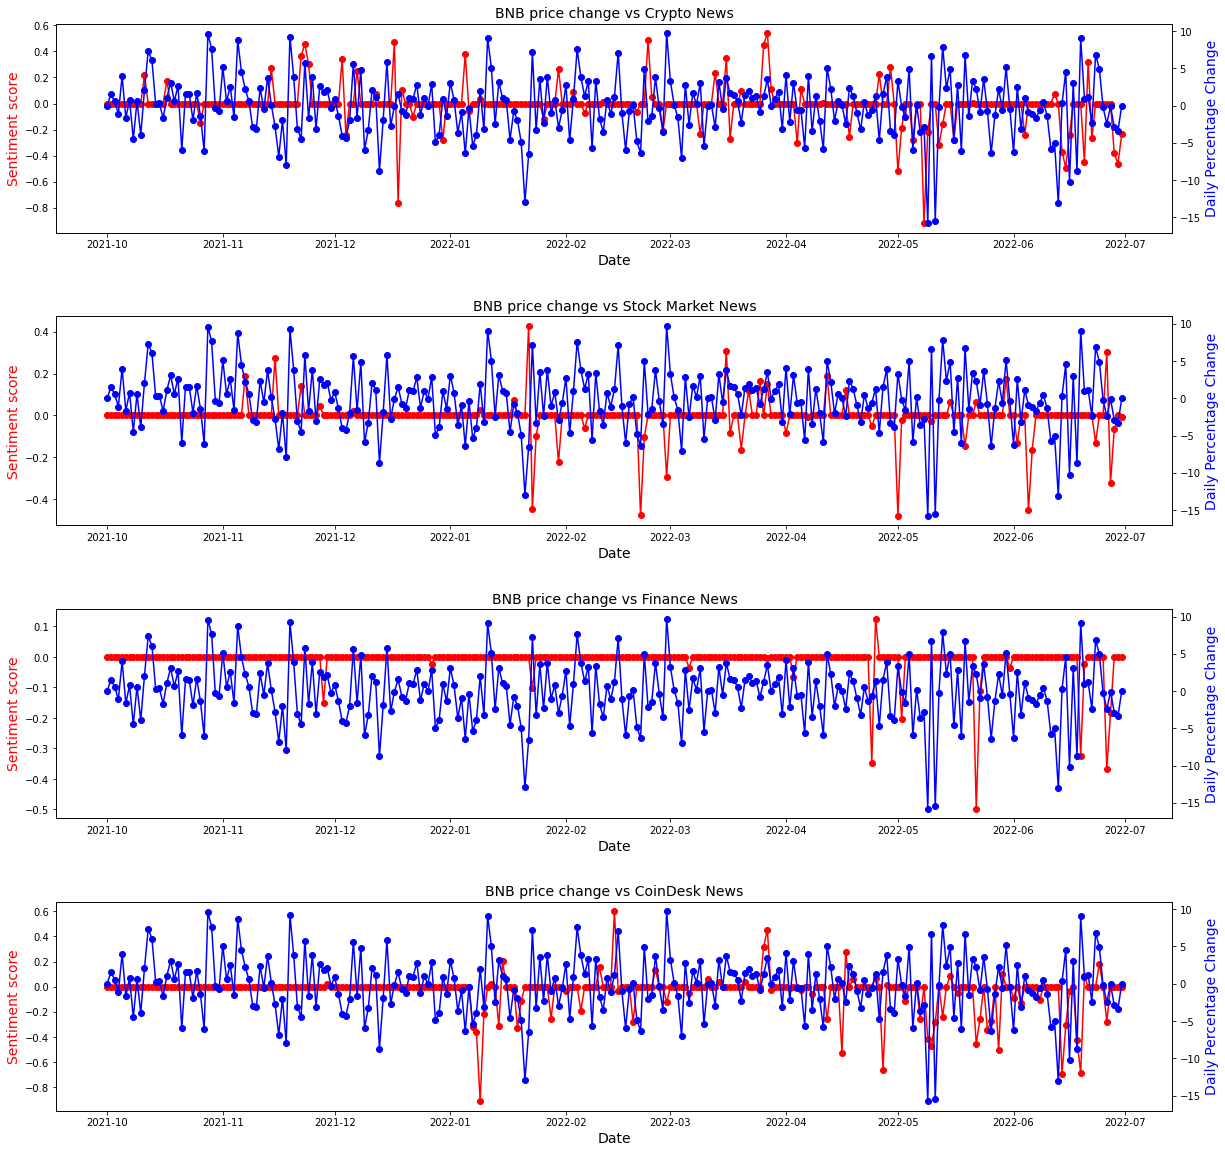

In [53]:
BNB_CryptoNews = BNB.join(crypto_news_filter_lagged).fillna(0)
BNB_StocksNews = BNB.join(stocks_market_news_filter_lagged).fillna(0)
BNB_FinanceNews = BNB.join(finance_news_filter_lagged).fillna(0)
BNB_CoinDeskNews = BNB.join(coindesk_news_filter_lagged).fillna(0)

plot_pricing_compare_sentiment("BNB", BNB_CryptoNews, BNB_StocksNews, BNB_FinanceNews, BNB_CoinDeskNews, num_plot=4)

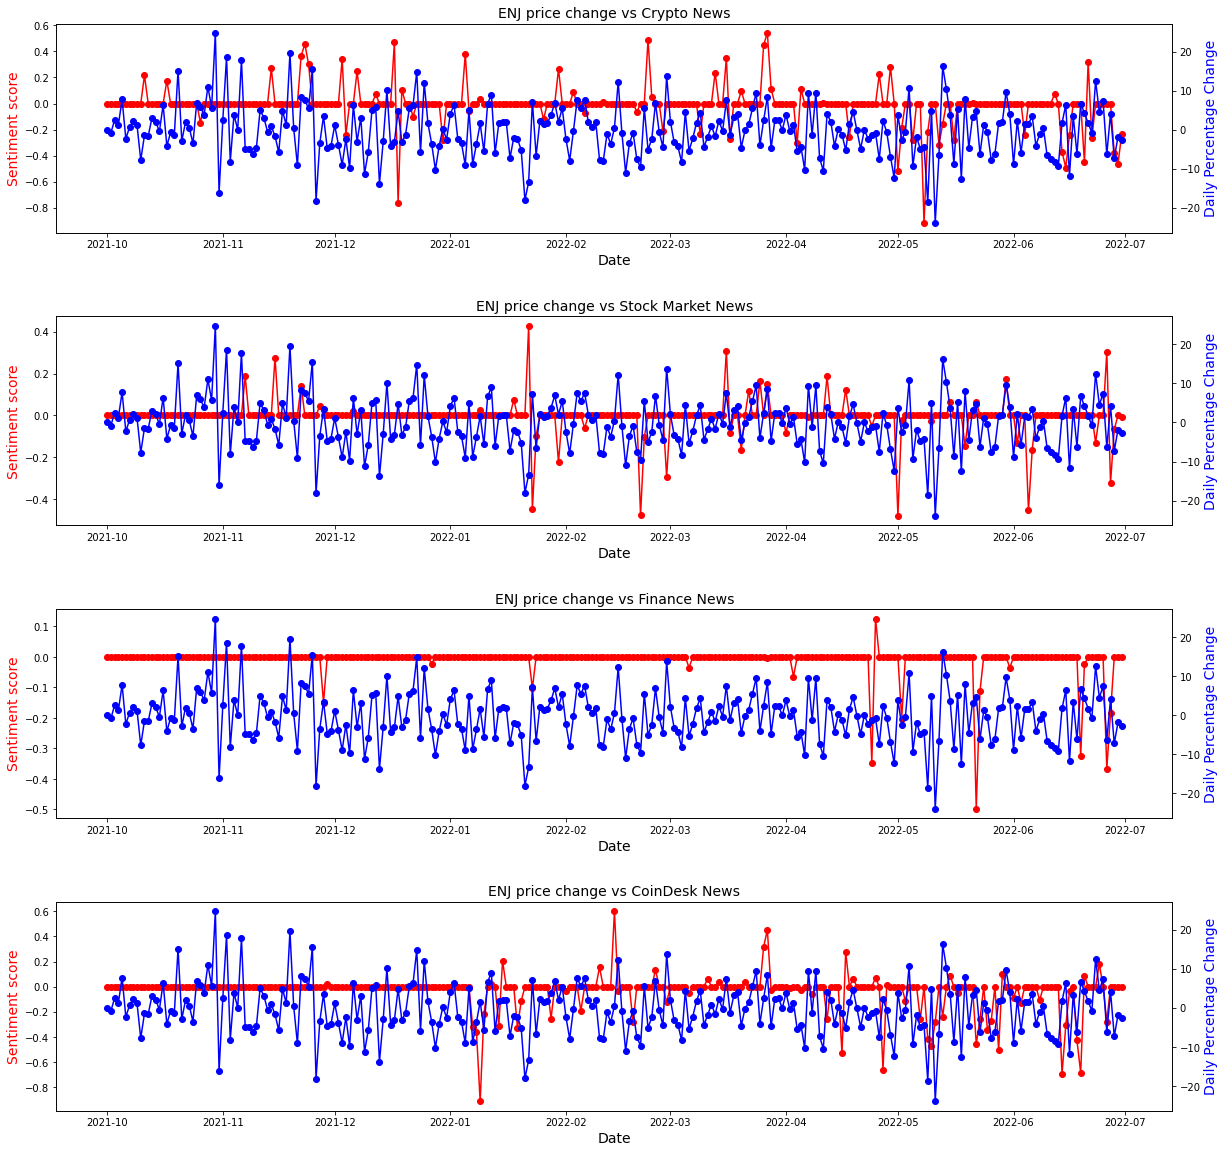

In [54]:
ENJ_CryptoNews = ENJ.join(crypto_news_filter_lagged).fillna(0)
ENJ_StocksNews = ENJ.join(stocks_market_news_filter_lagged).fillna(0)
ENJ_FinanceNews = ENJ.join(finance_news_filter_lagged).fillna(0)
ENJ_CoinDeskNews = ENJ.join(coindesk_news_filter_lagged).fillna(0)

plot_pricing_compare_sentiment("ENJ", ENJ_CryptoNews, ENJ_StocksNews, ENJ_FinanceNews, ENJ_CoinDeskNews, num_plot=4)

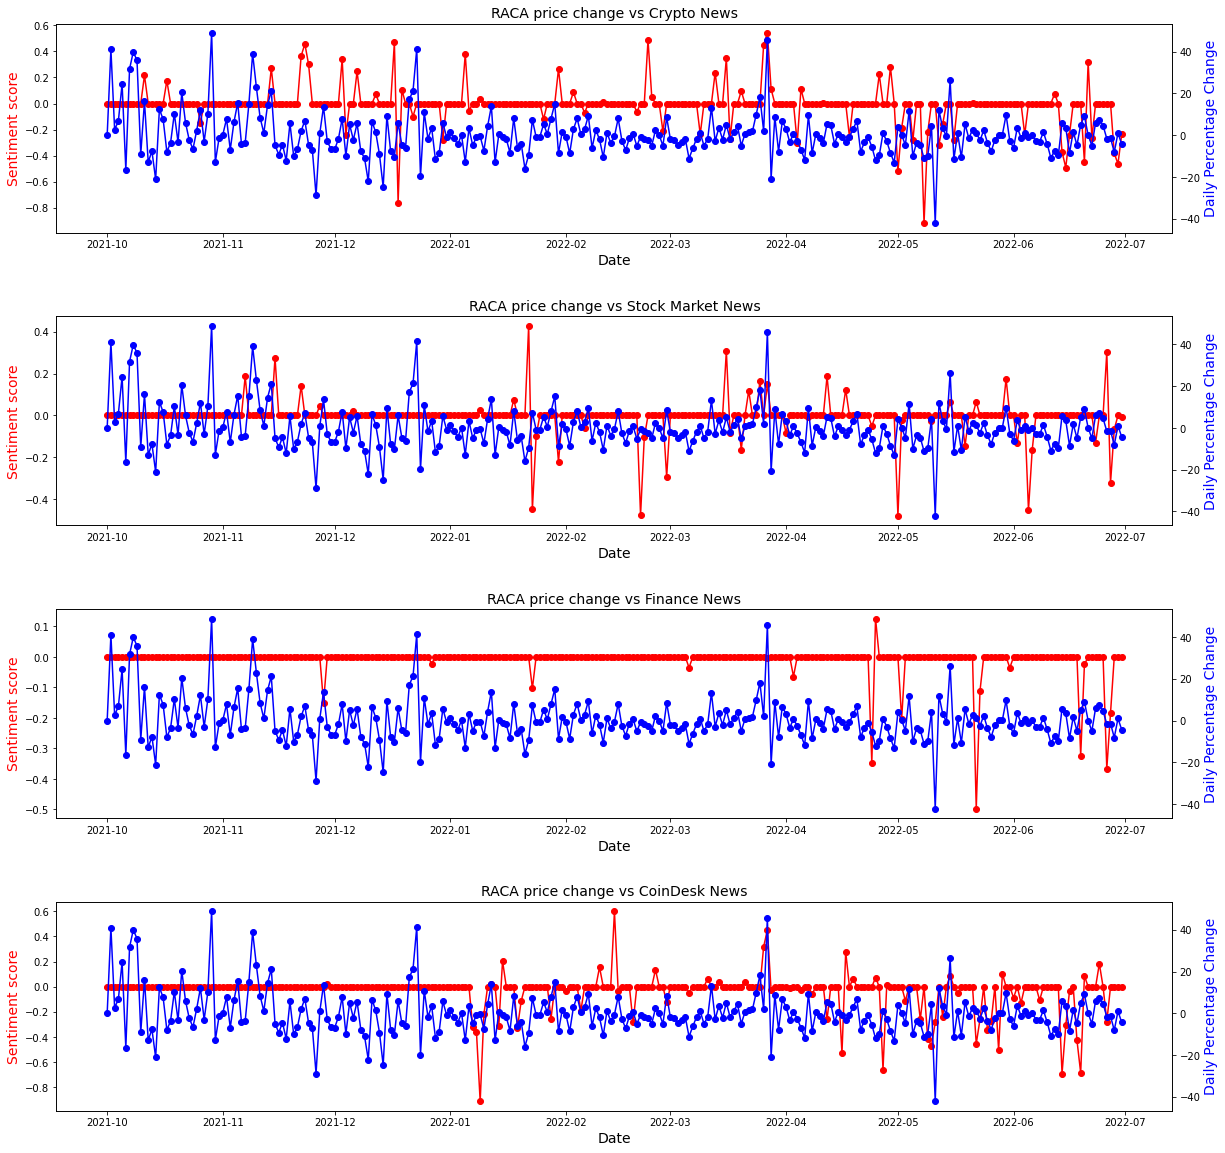

In [55]:
RACA_CryptoNews = RACA.join(crypto_news_filter_lagged).fillna(0)
RACA_StocksNews = RACA.join(stocks_market_news_filter_lagged).fillna(0)
RACA_FinanceNews = RACA.join(finance_news_filter_lagged).fillna(0)
RACA_CoinDeskNews = RACA.join(coindesk_news_filter_lagged).fillna(0)

plot_pricing_compare_sentiment("RACA", RACA_CryptoNews, RACA_StocksNews, RACA_FinanceNews, RACA_CoinDeskNews, num_plot=4)